In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_excel('UNDPMigrationOct22.xlsx', header = 1)
df.head()

,ResponseID,Date of data entry,Data entry ID,Questionnaire number,Interviewer ID,Date of interview,COUNTRY OF INTERVIEW,PARTNER,Location of interview,Place of interview,...,"Q141. If the government of [host country] could do one thing to help improve your life or help you to achieve your goals, what would it be? WRITE IN","Write in:Q141. If the government of [host country] could do one thing to help improve your life or help you to achieve your goals, what would it be? WRITE IN",Q142. Do you agree or disagree with the following statement? “I feel proud of what I have achieved living in Europe” SINGLE CODE,Q143. What do you hope to achieve by staying in Europe? WRITE IN,Write in:Q143. What do you hope to achieve by staying in Europe? WRITE IN,"Q144. Overall, are you positive or negative about your future life if you decide to stay in [host country]? SINGLE CODE","Q145. Finally, can I just check? How old are you? WRITE IN AGE","Q145. Finally, can I just check? How old are you? WRITE IN AGE.1",Comments,END OF SURVEY
0,22,06/06/2018,999,1,ES007,06/06/2018,Spain,Valencia,Valencia Russafa,Office of NGO/partner,...,98.0,NaN,1.0,1.0,12,2.0,37.0,35-39,0,XXXX
1,23,06/06/2018,997,1,990,06/06/2018,Spain,Valencia,"Russafa, Valencia",Office of NGO/partner,...,1.0,5,1.0,1.0,"6,9",2.0,24.0,20-24,0,XXXX
2,24,07/06/2018,999,2,990,06/07/2018,Spain,Valencia,Valencia Russafa,Office of NGO/partner,...,1.0,7,3.0,1.0,9,1.0,40.0,40+,0,XXXX
3,25,07/06/2018,997,2,ES007/ES001,06/07/2018,Spain,Valencia,Ruzafa Valencia,Office of NGO/partner,...,1.0,2,1.0,1.0,9,1.0,36.0,35-39,0,XXXX
4,27,07/06/2018,999,3,990,06/07/2018,Spain,Valencia,valencia Russafa,Office of NGO/partner,...,1.0,"2, 7",1.0,1.0,3,1.0,32.0,30-34,0,XXXX


In [3]:
for i in df:
    print(i)

ResponseID
Date of data entry
Data entry ID
Questionnaire number
Interviewer ID  
Date of interview
COUNTRY OF INTERVIEW
PARTNER
Location of interview
Place of interview
How was the respondent found?
Verbal consent acquired
ST
ET
DURATION
Language of Interview
TRANSLATED
Respondent's mother tongue?
Interview completed? If no, Why
GENDER
Q2. What was the first EU country that you arrived in? SINGLE CODE
Year:Q3. When did you arrive in Europe?
Month (enter number):Q3. When did you arrive in Europe?
Q4. Which EU country did you first register with the authorities, if you registered? SINGLE CODE
Q5. Did you arrive to Europe by sea or by land? SINGLE CODE
Q6. Is [host country] the country you want to stay in?
No (Ask which country? WRITE IN):Q6. Is [host country] the country you want to stay in?
Q7. Is this your first time in Europe?
Country:Q8. Where were you born?
City/town/village:Q8. Where were you born?
Q9. Country where individual grew up
Q10. Which country do you consider to be your 

In [14]:
#df88 = df.loc[:,['ResponseID','Q88. What is your main job / way of earning money now? WRITE IN']]
#plt.axes(aspect=1)
df88pu = df88p.fillna(value='unknown')

In [89]:
df88 = df.loc[:,['ResponseID','Q88. What is your main job / way of earning money now? WRITE IN']]

In [15]:
df37pu = df37p.fillna(value='unknown')

In [72]:
df37 = df.loc[:,['ResponseID','Q37. What was your main job / way of earning money when you decided to travel to Europe?']]

In [16]:
def percent(x):
    if math.isnan(x) == True:
        return "Don't work"
    else:
        return "Work"

In [8]:
df88p = df.loc[:,['Q88. What is your main job / way of earning money now? WRITE IN']]

In [17]:
#df88p = df88p.apply(lambda x : percent(x))
df88pu[df88pu.Europe == 'unknown'] = 'no work'
df88pu[df88pu.Europe != 'no work'] = 'work'

In [18]:
df37pu[df37pu.Home == 'unknown'] = 'no work'
df37pu[df37pu.Home != 'no work'] = 'work'

In [29]:
df88pu['count'] = 1
dfpc = df88pu.groupby('Europe').count()
dfpc
X = [dfpc.loc['no work', 'count'],dfpc.loc['work', 'count']]
X
dfpc

,count
Europe,
no work,1919
work,1108


In [20]:
df37pu['count'] = 1
dfpch = df37pu.groupby('Home').count()
dfpch

,count
Home,
no work,1491
work,1536


In [28]:
labelsh = ['no work', 'work']
Xh = [dfpch.loc['no work', 'count'],dfpch.loc['work', 'count']]
Xh

[1491, 1536]

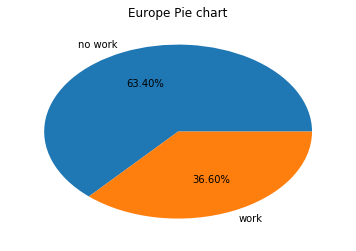

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure()
plt.pie(X,labels=labelsh,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Europe Pie chart")
 
plt.show()  
plt.savefig("EPieChart.jpg")

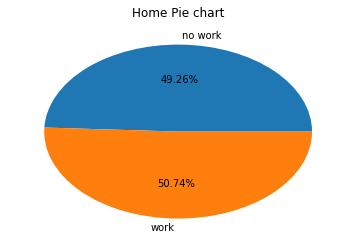

<Figure size 432x288 with 0 Axes>

In [34]:
fig = plt.figure()
plt.pie(Xh,labels=labelsh,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.title("Home Pie chart")
 
plt.show()  
plt.savefig("HPieChart.jpg")

In [11]:
df88p = df88p.rename(columns = \
            {'Q88. What is your main job / way of earning money now? WRITE IN': 'Europe'})

In [12]:
df37p = df.loc[:,['Q37. What was your main job / way of earning money when you decided to travel to Europe?']]

In [13]:
df37p = df37p.rename(columns = \
            {'Q37. What was your main job / way of earning money when you decided to travel to Europe?': 'Home'})

In [35]:
def fun(x):
    if len(str(x)) == 2:
        return str(x)[0]
    else:
        return str(x).lower().strip()
df88 = df88.rename(columns = \
            {'Q88. What is your main job / way of earning money now? WRITE IN': 'Europe'})
    
df88.loc[:,'Europe'] = df88.loc[:,'Europe'].apply(lambda x : fun(x))

df886 = df88.set_index('Europe')

In [36]:
df88.loc[:,'Europe'].apply(lambda x : fun(x))

0                     nan
1                     nan
2                     nan
3                     nan
4                     nan
5                     nan
6                     nan
7           "manutention"
8       i work in a short
9                     nan
10                      9
11                    nan
12                    nan
13                    nan
14                    nan
15                    nan
16                    nan
17                    nan
18                    nan
19                      9
20                    nan
21                    nan
22                    nan
23                    nan
24                    nan
25                    nan
26                    nan
27                    nan
28                    nan
29                    nan
              ...        
2997                  nan
2998                  nan
2999                  nan
3000                  nan
3001                  nan
3002                  nan
3003                  nan
3004        

In [37]:
df37 = df37.rename(columns = \
            {'Q37. What was your main job / way of earning money when you decided to travel to Europe?': 'At home'})
df37.loc[:,'At home'] = df37.loc[:,'At home'] \
       .apply(lambda x : fun(x))
df376 = df37.set_index('At home')

In [38]:
df886 = df88.set_index('Europe')

In [39]:
df377 = df376.rename(index={'"manutention"':'11-others',
                  '1':'1-managers',
                  '2':'2-professionals',
                  '3':'3-technicians and associate professionals',
                  '4':'4-clerical support workers',
                  '5':'5-services and sales workers',
                  '6':'6-skilled agricultural, forestry and fishery workers',
                  '7':'7-craft and related traders workers',
                  '8':'8-plant and machine operators and assemblers',
                  '9':'9-elementary occupations',
                  'book stationary':'11-others',
                  '9000':'10-government stipend/support',
                  '0':'0-Armed Forces Occupations',
                  '-':'11-others',
                  'employer':'11-others',
                  'functionary':'11-others',
                  'did not work, money from partner /friends':'11-others',
                  'foreign affairs adviser':'11-others',
                  'government work':'11-others',
                  'hospital':'11-others',
                  'i had a profession':'11-others',
                  'i was a beggar':'11-others',
                  'i was working for the local government':'11-others',
                  'local government':'11-others',
                  'mechatroniker':'11-others',
                  'service in lodge':'11-others',
                  'a beggar in a supermarket':'11-others',
                  'assist to logist goods send to africa':'11-others',
                  'cemeti (social)':'11-others',
                  'i help in the regional counsel':'11-others',
                  'sex worker':'11-others',
                  'municipality':'11-others',
                  'no job but working sometimes with some finnish':'11-others',
                  'ofi (government agency)':'11-others',
                  'smuggler':'11-others',
                  'slave':'11-others',
                  'student':'11-others',
                  'dolomble':'11-others',
                  'far':'11-others',
                  'manutention':'11-others',
                  'populariser':'11-others',
                  'refused':'11-others'},
                   columns={'ResponseID': 'count'})

In [40]:
#df88c.loc[df88c['q88'].lenth() == 2].apply(lambda x : str(x)[0])
def fun(x):
    if len(str(x)) == 2:
        return str(x)[0]
    else:
        return str(x).lower().strip()
df886['Europe'] = df886.index
df886.loc[:,'Europe'] = df886.loc[:,'Europe'].apply(lambda x : fun(x))

In [41]:
df887 = df886.rename(index={'"manutention"':'9-elementary occupations',
                  '1':'1-managers',
                  '2':'2-professionals',
                  '3':'3-technicians and associate professionals',
                  '4':'4-clerical support workers',
                  '5':'5-services and sales workers',
                  '6':'6-skilled agricultural, forestry and fishery workers',
                  '7':'7-craft and related traders workers',
                  '8':'8-plant and machine operators and assemblers',
                  '9':'9-elementary occupations',
                  '9000':'10-government stipend/support',
                  '999':'refused',
                  'a beggar in a supermarket':'11-others',
                  'assist to logist goods send to africa':'11-others',
                  'cemeti (social)':'11-others',
                  'i help in the regional counsel':'11-others',
                  'i work for the red cross':'11-others',
                  'i work in a short':'11-others',
                  'i work in the black market here and there in different activities':'11-others',
                  'interim':'11-others',
                  'municipality':'11-others',
                  'no job but working sometimes with some finnish':'11-others',
                  'ofi (government agency)':'11-others',
                  'sex worker':'11-others',
                  'student':'11-others',
                  'support worker':'11-others',
                  'un organization':'11-others',
                  'voluntario':'11-others',
                  'work with primo, stockholm':'11-others'},
                columns={'ResponseID': 'count'}
                 )

In [42]:
df378 = df377.groupby('At home').count()
df378 = df378.drop(['nan'])

In [43]:
df888 = df887.groupby('Europe').count()
df888 = df888.drop(['nan'])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Europe' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [44]:
df888 = df888.rename(index={'"manutention"':'9-elementary occupations',
                  '1':'1-managers',
                  '2':'2-professionals',
                  '3':'3-technicians and associate professionals',
                  '4':'4-clerical support workers',
                  '5':'5-services and sales workers',
                  '6':'6-skilled agricultural, forestry and fishery workers',
                  '7':'7-craft and related traders workers',
                  '8':'8-plant and machine operators and assemblers',
                  '9':'9-elementary occupations',
                  '9000':'10-government stipend/support',
                  '999':'refused',
                  'a beggar in a supermarket':'11-others',
                  'assist to logist goods send to africa':'11-others',
                  'cemeti (social)':'11-others',
                  'i help in the regional counsel':'11-others',
                  'i work for the red cross':'11-others',
                  'i work in a short':'11-others',
                  'i work in the black market here and there in different activities':'11-others',
                  'interim':'11-others',
                  'municipality':'11-others',
                  'no job but working sometimes with some finnish':'11-others',
                  'ofi (government agency)':'11-others',
                  'sex worker':'11-others',
                  'student':'11-others',
                  'support worker':'11-others',
                  'un organization':'11-others',
                  'voluntario':'11-others',
                  'work with primo, stockholm':'11-others'}
                 )

In [48]:
df889['Europe'] = df889.index
df889 = df889.groupby('Europe').sum()

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'Europe' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


In [46]:
df889 = df888.drop('refused')

In [49]:
df889 = df889.reindex(['1-managers','2-professionals',
                     '3-technicians and associate professionals',
                     '4-clerical support workers',
                     '5-services and sales workers',
                     '6-skilled agricultural, forestry and fishery workers',
                     '7-craft and related traders workers',
                     '8-plant and machine operators and assemblers',
                     '9-elementary occupations',
                     '10-government stipend/support',
                     '11-others'])
df889['Europe'] = df889.index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

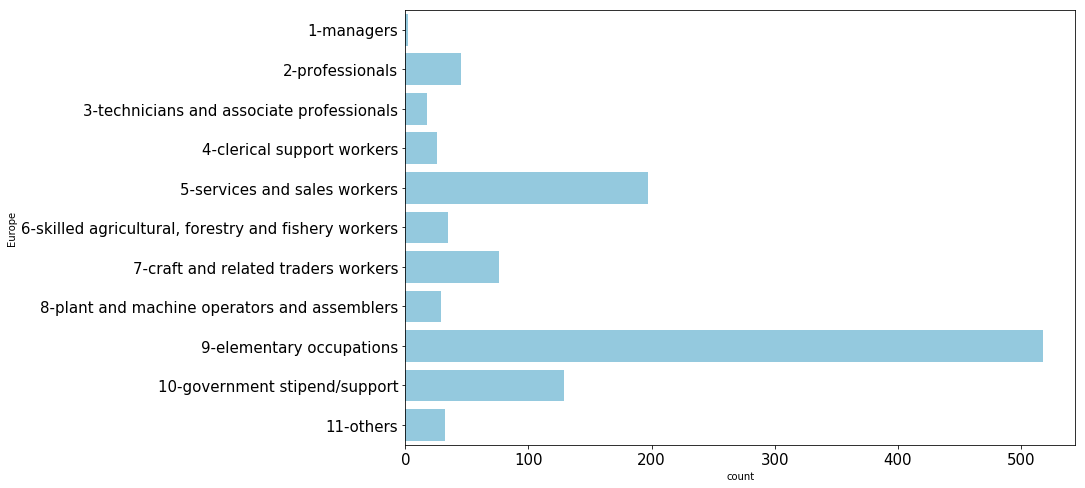

In [50]:
sns.barplot(x = 'count', y = 'Europe', data = df889, color="skyblue")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax.set_xlabel('count',fontsize=20)
#ax.set_ylabel('q88',fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text yticklabel objects>)

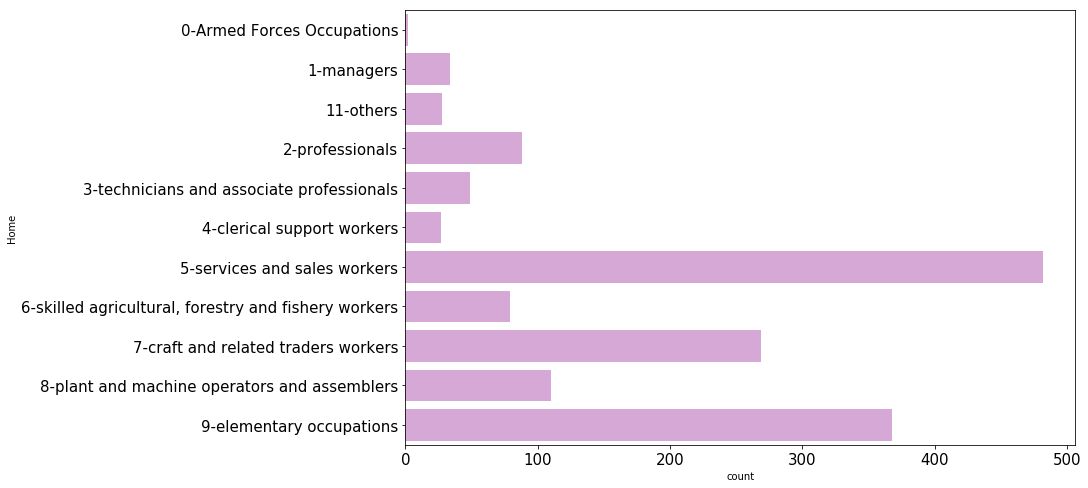

In [51]:
df378['Home'] = df378.index
sns.barplot(x = 'count', y = 'Home', data = df378, color="plum")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [52]:
df378

,count,Home
At home,,
0-Armed Forces Occupations,2,0-Armed Forces Occupations
1-managers,34,1-managers
11-others,28,11-others
2-professionals,88,2-professionals
3-technicians and associate professionals,49,3-technicians and associate professionals
4-clerical support workers,27,4-clerical support workers
5-services and sales workers,482,5-services and sales workers
"6-skilled agricultural, forestry and fishery workers",79,"6-skilled agricultural, forestry and fishery w..."
7-craft and related traders workers,269,7-craft and related traders workers


In [90]:
df1 = df88
df2 = df37

In [91]:
df11 = df1.rename(columns = {'Europe': 'Cat'})
df21 = df2.rename(columns = {'Home': 'Cat'})

In [92]:
df21

,ResponseID,Cat
0,22,NaN
1,23,71
2,24,52
3,25,61
4,27,NaN
5,28,95
6,29,83
7,30,83
8,31,NaN
9,32,51


In [93]:
dfmerge = pd.merge(df11,df21,how='outer')

In [94]:
sns.barplot(x = 'count', y = 'Cat', data = dfmerge, hue="loc", palette="Set2")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ValueError: Could not interpret input 'count'

In [95]:
df377 = df376.rename(index={'"manutention"':'11-others',
                  '1':'1-managers',
                  '2':'2-professionals',
                  '3':'3-technicians and associate professionals',
                  '4':'4-clerical support workers',
                  '5':'5-services and sales workers',
                  '6':'6-skilled agricultural, forestry and fishery workers',
                  '7':'7-craft and related traders workers',
                  '8':'8-plant and machine operators and assemblers',
                  '9':'9-elementary occupations',
                  'book stationary':'11-others',
                  '9000':'10-government stipend/support',
                  '0':'0-Armed Forces Occupations',
                  '-':'11-others',
                  'employer':'11-others',
                  'functionary':'11-others',
                  'did not work, money from partner /friends':'11-others',
                  'foreign affairs adviser':'11-others',
                  'government work':'11-others',
                  'hospital':'11-others',
                  'i had a profession':'11-others',
                  'i was a beggar':'11-others',
                  'i was working for the local government':'11-others',
                  'local government':'11-others',
                  'mechatroniker':'11-others',
                  'service in lodge':'11-others',
                  'a beggar in a supermarket':'11-others',
                  'assist to logist goods send to africa':'11-others',
                  'cemeti (social)':'11-others',
                  'i help in the regional counsel':'11-others',
                  'sex worker':'11-others',
                  'municipality':'11-others',
                  'no job but working sometimes with some finnish':'11-others',
                  'ofi (government agency)':'11-others',
                  'smuggler':'11-others',
                  'slave':'11-others',
                  'student':'11-others',
                  'dolomble':'11-others',
                  'far':'11-others',
                  'manutention':'11-others',
                  'populariser':'11-others',
                  'refused':'11-others'})

In [122]:
def fun(x):
    if len(str(x).strip()) == 2:
        return int(x)
    elif len(str(x).strip()) == 1 and str(x).strip() != '-' \
         and str(x).strip() != '0':
        return int(x)*10+1
    else:
        return str(x).lower().strip()
df88 = df88.rename(columns = \
            {'Q88. What is your main job / way of earning money now? WRITE IN': 'Europe'})
df37 = df37.rename(columns = \
            {'Q37. What was your main job / way of earning money when you decided to travel to Europe?': 'Home'})

In [123]:
df880 = df88.fillna(value=110)
df370 = df37.fillna(value=110)
df880.loc[:,'Europe'] = df880.loc[:,'Europe'].apply(lambda x : fun(x))
df8801 = df880.set_index('Europe')
df370.loc[:,'Home'] = df370.loc[:,'Home'].apply(lambda x : fun(x))
df3701 = df370.set_index('Home')

In [124]:
df3702 = df3701.rename(index={'"manutention"':110,
                  'book stationary':110,
                  '9000':100,
                  '0':110,
                  '-':110,
                  'employer':110,
                  'functionary':110,
                  'did not work, money from partner /friends':110,
                  'foreign affairs adviser':110,
                  'government work':110,
                  'hospital':110,
                  'i had a profession':110,
                  'i was a beggar':110,
                  'i was working for the local government':110,
                  'local government':110,
                  'mechatroniker':110,
                  'service in lodge':110,
                  'a beggar in a supermarket':110,
                  'assist to logist goods send to africa':110,
                  'cemeti (social)':110,
                  'i help in the regional counsel':110,
                  'sex worker':110,
                  'municipality':110,
                  'no job but working sometimes with some finnish':110,
                  'ofi (government agency)':110,
                  'smuggler':110,
                  'slave':110,
                  'student':110,
                  'dolomble':110,
                  'far':110,
                  'manutention':110,
                  'populariser':110,
                  'refused':110})

In [125]:
df8802 = df8801.rename(index={'"manutention"': 110,
                  '9000': 100,
                  '999': 110,
                  'a beggar in a supermarket': 110,
                  'assist to logist goods send to africa': 110,
                  'cemeti (social)': 110,
                  'i help in the regional counsel': 110,
                  'i work for the red cross': 110,
                  'i work in a short': 110,
                  'i work in the black market here and there in different activities': 110,
                  'interim': 110,
                  'municipality': 110,
                  'no job but working sometimes with some finnish': 110,
                  'ofi (government agency)': 110,
                  'sex worker': 110,
                  'student': 110,
                  'support worker': 110,
                  'un organization': 110,
                  'voluntario': 110,
                  'work with primo, stockholm': 110},
                 )

In [126]:
df8802['EuropeClass'] = df8802.index
df3702['HomeClass'] = df3702.index

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


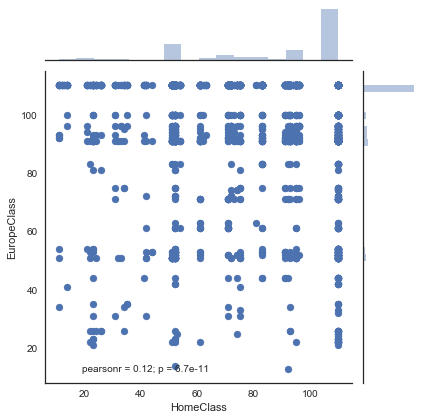

In [127]:
dfmerge2 = pd.merge(df3702,df8802,on='ResponseID',how='outer')
dfmerge2[['HomeClass','EuropeClass']] = dfmerge2[['HomeClass','EuropeClass']].astype(int)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x="HomeClass", y="EuropeClass", data=dfmerge2)

In [102]:
dfmerge2 = pd.merge(df3702,df8802,on='ResponseID',how='outer')
dfmerge2

,ResponseID,HomeClass,EuropeClass
0,22,110,110
1,23,71,110
2,24,52,110
3,25,61,110
4,27,110,110
5,28,95,110
6,29,83,110
7,30,83,110
8,31,110,110
9,32,51,110


/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


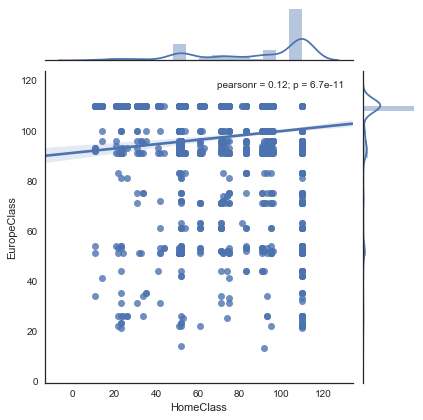

In [128]:
g = sns.jointplot("HomeClass", "EuropeClass", data=dfmerge2, kind="reg")